In [6]:
import sys
sys.path.append('../src')
import os
from pathlib import Path
from csi_sign_language.data.dataset.phoenix14 import Phoenix14SegDataset, Phoenix14GraphSegDataset
import tqdm
import hydra
from omegaconf import DictConfig, OmegaConf
from csi_sign_language.data.build import build_dataset
import matplotlib.pyplot as plt

In [7]:
cfg = OmegaConf.load('../configs/defaultv2.yaml')
dataset = build_dataset(cfg)
dataset = dataset['train_set']
dataset['train_set'].dataset.transforms=None
data = dataset[0]
data

NameError: name 'TimporalNormalization' is not defined

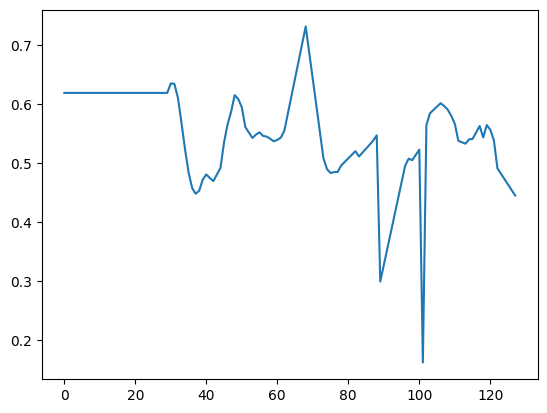

In [ ]:
d = data['lhand']
mask = data['time_mask']
a = d[:, 0, 0]
plt.plot(a)

In [4]:
from hampel import hampel
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def normalize(x, axis):
    mean = np.mean(x, axis, keepdims=True)
    std = np.std(x, axis, keepdims=True)
    return (x - mean)/ (std + 1e-7)

def norm(x, axis):
    mmax = np.max(x, axis, keepdims=True)
    mmin = np.min(x, axis, keepdims=True)
    return (x - mmin) / (mmax - mmin)

def interp(x: np.array, mask=None):
    """interp the signal of each channel in time
    :param x: [time, nodes, channel]
    :param mask: mask in time
    """
    num_nodes = x.shape[-2]
    channels = x.shape[-1]
    for node_idx in range(num_nodes):
        for channel_idx in range(channels):
            signal = x[:, node_idx, channel_idx] 
            no_zero_indices = np.where(signal != 0)[0]
            zero_indices = np.where(signal == 0)[0]
            interp_values = np.interp(zero_indices, no_zero_indices, signal[no_zero_indices])
            x[zero_indices, node_idx, channel_idx] = interp_values
    
    if mask is not None:
        pass
        x[~mask, :, :] = 0.
        
    return x


d_ = interp(d, mask)
d_ = norm(d_, 0)
plt.plot(d_[:, 10, 0])

NameError: name 'd' is not defined